# Pandas Challenges - Solutions

Date:      Jan 28, 2015 (updated 8/8/2015 by RS)  

By:        Irmak, Reshama  

Dataset:   2013_movies.csv (top grossing movies from 2013)

-------

##Table of Contents
###Challenges: Exploring and visualizing our scraped movie data in pandas

[Data Prep](#0)

[Challenge01](#1) 
plot domestic total gross over time (release date)

[Challenge02](#2) 
plot runtime vs domestic total gross

[Challenge03](#3) 
group your data by Rating and find the average runtime and domestic total gross at each level of Rating

[Challenge04](#4) 
make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross

[Challenge05](#5) 
what director in your dataset has the highest gross per movie?

[Challenge06](#6) 
bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

title of graph should include: Mean Domestic Total Gross by Month in 2013

topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."


 ### <a id='0'></a>Data Prep

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
mv_df = pd.read_csv("2013_movies.csv")

print type(mv_df)
print len(mv_df)
mv_df.head(3)

<class 'pandas.core.frame.DataFrame'>
100


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


In [3]:
print mv_df.columns
print "\n"
print mv_df.dtypes

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating', u'Runtime', u'ReleaseDate'], dtype='object')


Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object


In [4]:
# convert ReleaseDate from 'object' to 'datetime'
mv_df['reldate'] = mv_df['ReleaseDate'].apply(pd.to_datetime)
print mv_df.dtypes
 
mv_df[:3]

Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDate                   object
reldate               datetime64[ns]
dtype: object


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,reldate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,2013-11-22
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,2013-05-03
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,2013-11-22


 ### <a id='1'></a> Challenge 1

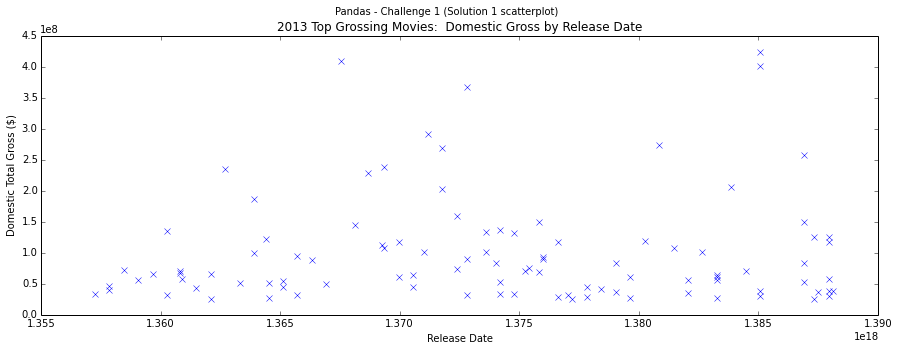

In [5]:
# Challenge 1: plot domestic total gross over time
# Solution 1:  scatterplot
fig=plt.figure(figsize=(15,5))

plt.plot(mv_df['reldate'],mv_df['DomesticTotalGross'],'bx')

plt.title("2013 Top Grossing Movies:  Domestic Gross by Release Date")
plt.suptitle("Pandas - Challenge 1 (Solution 1 scatterplot)")
plt.ylabel('Domestic Total Gross ($)')
plt.xlabel('Release Date')


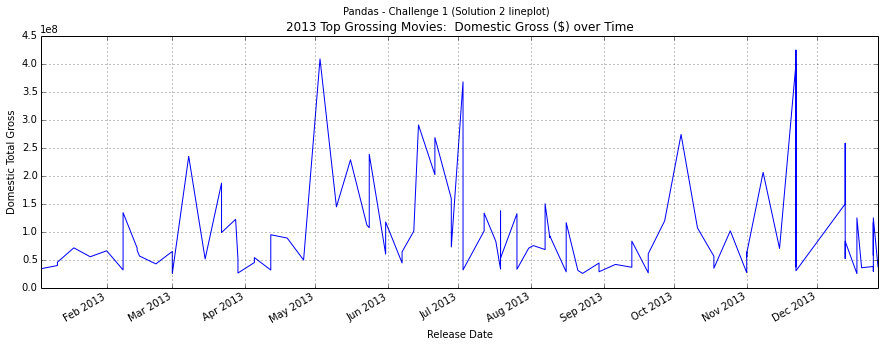

In [6]:
# Challenge 1: plot domestic total gross over time
# Solution 2:  line plot

fig = plt.figure(figsize=(15,5))
ax = plt.gca()
mv_df = mv_df.sort(columns=['reldate'])
mv_df.plot(x='reldate',y='DomesticTotalGross', ax=ax)

plt.title("2013 Top Grossing Movies:  Domestic Gross ($) over Time")
plt.suptitle("Pandas - Challenge 1 (Solution 2 lineplot)")
plt.ylabel('Domestic Total Gross')
plt.xlabel('Release Date')


### <a id='2'></a> Challenge 2

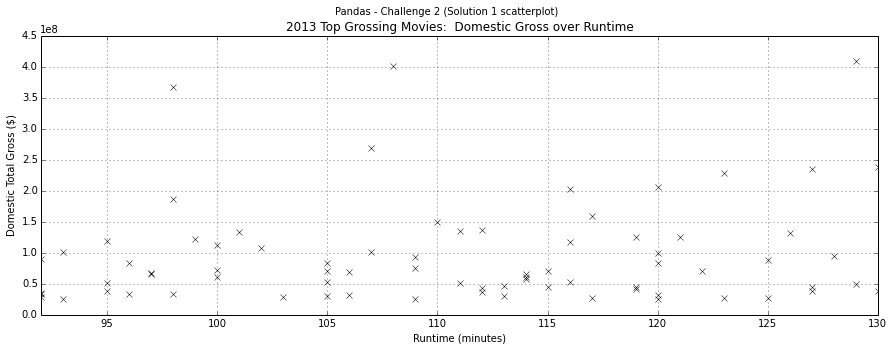

In [7]:
# Challenge 2: plot runtime vs domestic total gross
# Solution 1 - don't worry about sorting if you use a marker for each datapoint (scatterplot)
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
mv_df.plot(x='Runtime',y='DomesticTotalGross',style='kx', ax=ax)

plt.title("2013 Top Grossing Movies:  Domestic Gross over Runtime")
plt.suptitle("Pandas - Challenge 2 (Solution 1 scatterplot)")
plt.ylabel('Domestic Total Gross ($)')
plt.xlabel('Runtime (minutes)')

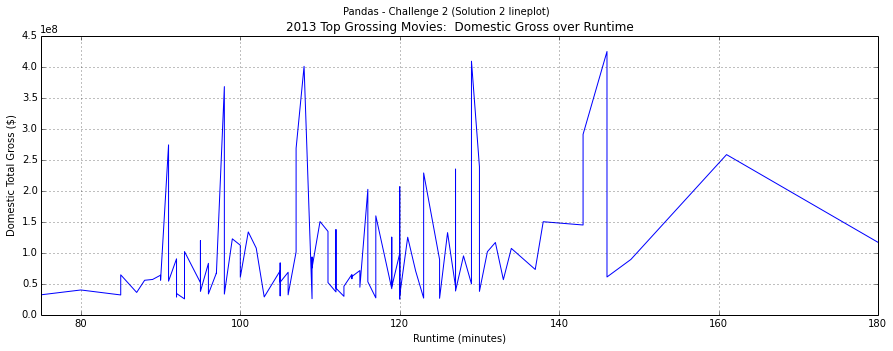

In [8]:
# Challenge 2: plot runtime vs domestic total gross
# Solution 2 - lineplot

fig = plt.figure(figsize=(15,5))
ax = plt.gca()
mv_df = mv_df.sort(columns=['Runtime'])
mv_df.plot(x='Runtime',y='DomesticTotalGross', ax=ax)

plt.title("2013 Top Grossing Movies:  Domestic Gross over Runtime")
plt.suptitle("Pandas - Challenge 2 (Solution 2 lineplot)")
plt.ylabel('Domestic Total Gross ($)')
plt.xlabel('Runtime (minutes)')

### <a id='3'></a> Challenge 3

In [9]:
# Challenge 3: group your data by Rating and find the average runtime and domestic total gross at each level of Rating
 
pd.options.display.float_format='{:.1f}'.format

df_rating = mv_df.groupby('Rating')
print df_rating.count()

df_by_rating = mv_df.groupby('Rating')['Runtime','DomesticTotalGross'].count()
print "\nRating group (by count): ", df_by_rating

df_by_rating = mv_df.groupby('Rating')['Runtime','DomesticTotalGross'].mean()
df_by_rating
        

        Title  Budget  DomesticTotalGross  Director  Runtime  ReleaseDate  \
Rating                                                                      
G           1       0                   1         1        1            1   
PG         15      15                  15        14       15           15   
PG-13      47      41                  47        45       47           47   
R          37      33                  37        36       37           37   

        reldate  
Rating           
G             1  
PG           15  
PG-13        47  
R            37  

Rating group (by count):          Runtime  DomesticTotalGross
Rating                             
G             1                   1
PG           15                  15
PG-13        47                  47
R            37                  37


,Runtime,DomesticTotalGross
Rating,,
G,107.0,268492764.0
PG,99.9,131135716.1
PG-13,117.5,111449769.0
R,110.7,69892429.0


In [10]:
print df_rating.count()


        Title  Budget  DomesticTotalGross  Director  Runtime  ReleaseDate  \
Rating                                                                      
G           1       0                   1         1        1            1   
PG         15      15                  15        14       15           15   
PG-13      47      41                  47        45       47           47   
R          37      33                  37        36       37           37   

        reldate  
Rating           
G             1  
PG           15  
PG-13        47  
R            37  


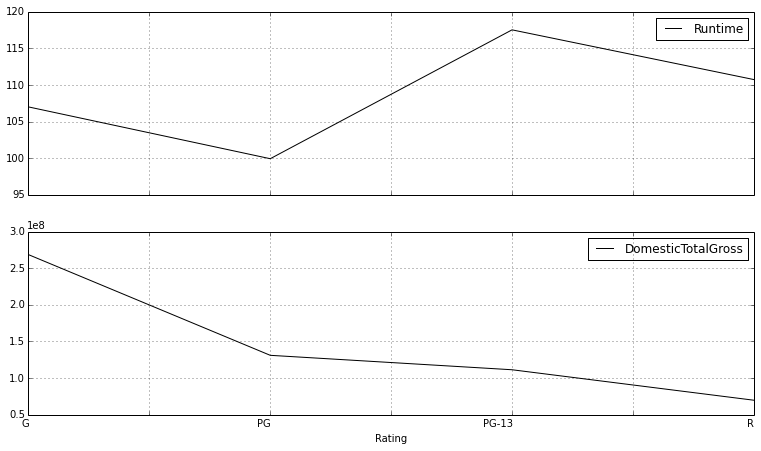

In [11]:
# Challenge 3 bonus plot
axs =df_by_rating.plot(subplots=True)
axs[0].get_figure().set_size_inches(13,8)

### <a id='4'></a> Challenge 4

//anaconda/lib/python2.7/site-packages/matplotlib/axes.py:2536: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  + 'left=%s, right=%s') % (left, right))


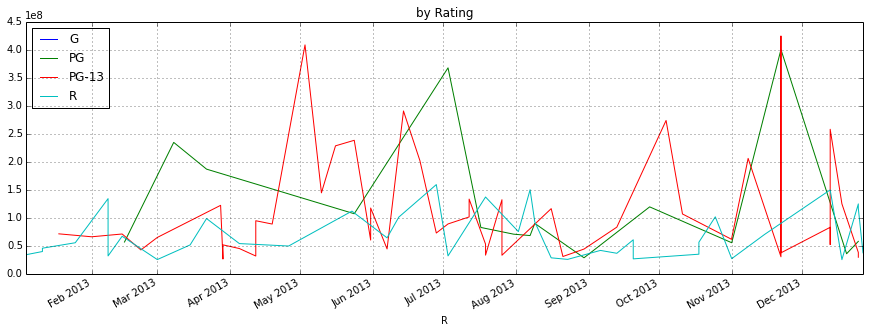

In [12]:
# Challenge 4 - Release Date by Domestic Total Gross  
# lineplots - all 4 groups on one plot   
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
labels = []
for name, group in mv_df.groupby('Rating'):
    group.plot(x='reldate', y='DomesticTotalGross', title="by Rating", label=name, ax=ax)
    labels.append(name)
plt.legend(labels, loc='best')
  


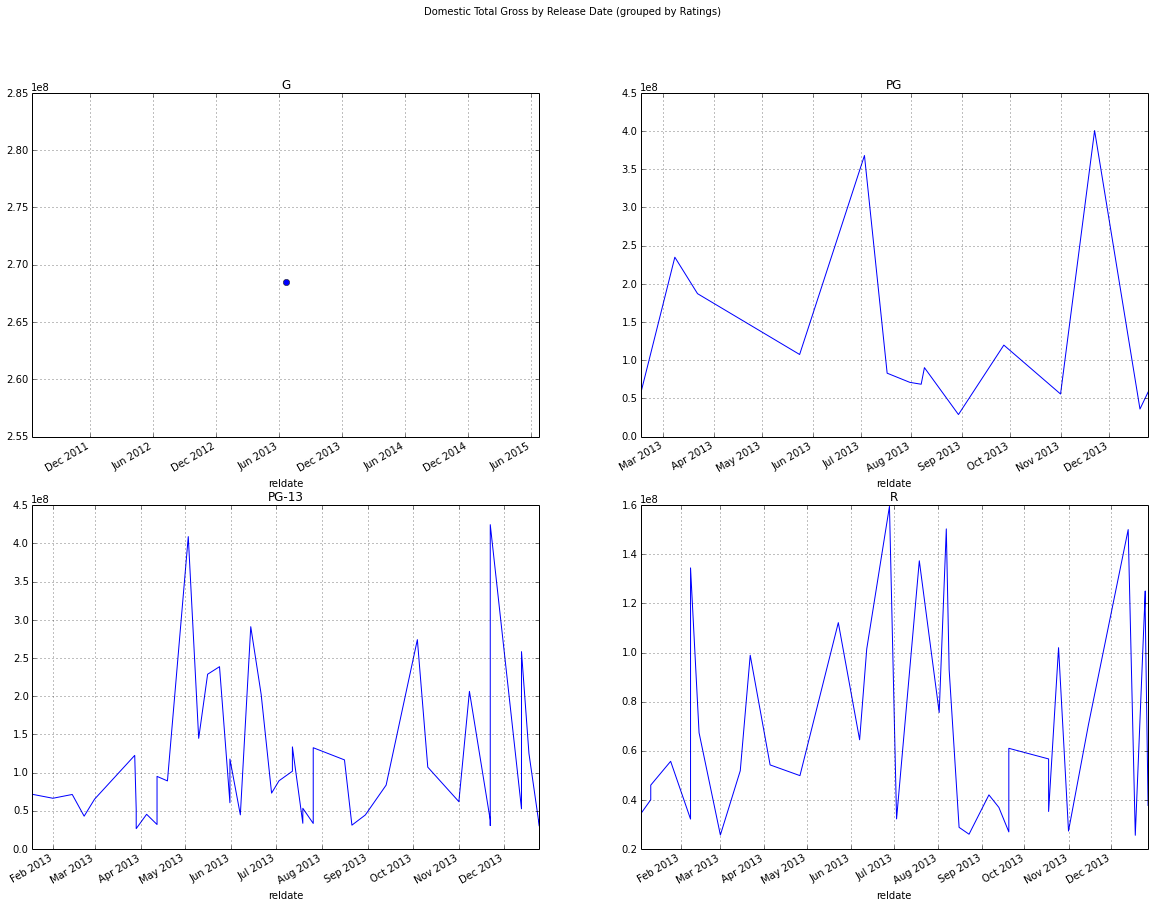

In [13]:
# Challenge 4: make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date 
#              vs the domestic total gross

#--------------------------------------------------------------------------
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
#mv_df = mv_df.sort(columns=['reldate'])
mv_df = mv_df.sort(columns=['reldate','Rating'])


group_pg   = mv_df[mv_df['Rating'] == "PG"]
group_pg13 = mv_df[mv_df['Rating'] == "PG-13"]
group_r    = mv_df[mv_df['Rating'] == "R"]
group_g    = mv_df[mv_df['Rating'] == "G"]
 

fig= plt.figure(figsize=(20,15))
plt.suptitle("Domestic Total Gross by Release Date (grouped by Ratings) ")

ax = plt.subplot(2,2,1) 
group_g.plot(x='reldate',y='DomesticTotalGross', title="G", ax=ax, style='o')

ax = plt.subplot(2,2,2) 
group_pg.plot(x='reldate',y='DomesticTotalGross', title="PG", ax=ax)

ax = plt.subplot(2,2,3) 
group_pg13.plot(x='reldate',y='DomesticTotalGross', title="PG-13", ax=ax)

ax = plt.subplot(2,2,4) 
group_r.plot(x='reldate',y='DomesticTotalGross', title="R", ax=ax)


### <a id='5'></a> Challenge 5

In [14]:
# Challenge 5: what director in your dataset has the highest gross per movie (highest avg gross)?
# Solution 1

grouped_by_director = mv_df.groupby('Director')
director_means = grouped_by_director['DomesticTotalGross'].agg([np.count_nonzero,np.mean]).sort('mean',ascending=False)
#director_means.head(5)

print "Solution 1:  The director with the highest gross per movie (avg) is: "
print director_means.head(1)

# OR, alternatively
print '\n------'
print 'Solution 2:'
print 'Highest average gross for a director:', grouped_by_director['DomesticTotalGross'].mean().max()
print 'And this talented person is....', grouped_by_director['DomesticTotalGross'].mean().argmax()

Solution 1:  The director with the highest gross per movie (avg) is: 
                  count_nonzero       mean
Director                                  
Francis Lawrence              1  424668047

------
Solution 2:
Highest average gross for a director: 424668047
And this talented person is.... Francis Lawrence


In [15]:
# Challenge 5: what director in your dataset has the highest gross per movie?
# Solution 3 - Here is the same table with the one-hit-wonders removed. 

print 'Solution 3:  Directors with Highest Gross (one-hit-wonders removed)'
dir_means_multiple_movies = director_means[director_means['count_nonzero']>1]
dir_means_multiple_movies.sort(columns=['mean'],ascending=False).head(15)


Solution 3:  Directors with Highest Gross (one-hit-wonders removed)


,count_nonzero,mean
Director,,
James Wan,2,110493294
Tyler Perry,2,52259354
Malcolm D. Lee,2,51270491


### <a id='6'></a> Challenge 6

In [16]:
# Challenge 6: bin your dataset into months (if applicable) and make a bar graph with error bars of gross each year
# We will do month for this exercise since all records have year 2013

# extract month from datetime64
mv_df['month'] =  pd.DatetimeIndex(mv_df['reldate']).month
print mv_df[:2] 

# month is a number from 1-12.  Creating a dictionary so it is a Month Name
monthDict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
def f(x):
    monthlabel = monthDict[x]
    return monthlabel

mv_df['monthlabel'] = mv_df['month'].apply(f)
print mv_df.head(2)

# if possible, would be good to label the months from 1-12 to 'Jan' to 'Dec'


                Title    Budget  DomesticTotalGross         Director Rating  \
83  Texas Chainsaw 3D       nan            34341945  John Luessenhop      R   
76    A Haunted House 2500000.0            40041683   Michael Tiddes      R   

    Runtime          ReleaseDate    reldate  month  
83       92  2013-01-04 00:00:00 2013-01-04      1  
76       80  2013-01-11 00:00:00 2013-01-11      1  
                Title    Budget  DomesticTotalGross         Director Rating  \
83  Texas Chainsaw 3D       nan            34341945  John Luessenhop      R   
76    A Haunted House 2500000.0            40041683   Michael Tiddes      R   

    Runtime          ReleaseDate    reldate  month monthlabel  
83       92  2013-01-04 00:00:00 2013-01-04      1        Jan  
76       80  2013-01-11 00:00:00 2013-01-11      1        Jan  


In [17]:
import math 
ygrouped = mv_df.groupby(mv_df['month']) #.map(lambda x: x.month))

monthmeans = ygrouped['DomesticTotalGross'].agg({'count':'count', 'mean':'mean', \
                                                 'sum':'sum','std':'std',\
                                                 'sem':lambda x: np.std(x, ddof=1)/ math.sqrt(len(x))})
print type(monthmeans)
print monthmeans



<class 'pandas.core.frame.DataFrame'>
       count         std         sum       sem       mean
month                                                    
1          5  14659469.4   247716186   6555914   49543237
2          7  32831848.6   471702096  12409272   67386013
3          9  73239416.7   864873866  24413138   96097096
4          6  25301038.7   365644317  10329105   60940719
5          8 111775447.3  1419277764  39518588  177409720
6          8  95199936.2  1205200046  33658260  150650005
7         12  91408365.1  1269368663  26387322  105780721
8         11  41322322.5   753843894  12459149   68531263
9          6  34823268.8   370273886  14216539   61712314
10         5  93943296.2   575135191  42012719  115027038
11        10 153601101.1  1379367599  48572933  137936759
12        13  66838245.2  1137284014  18537593   87483385


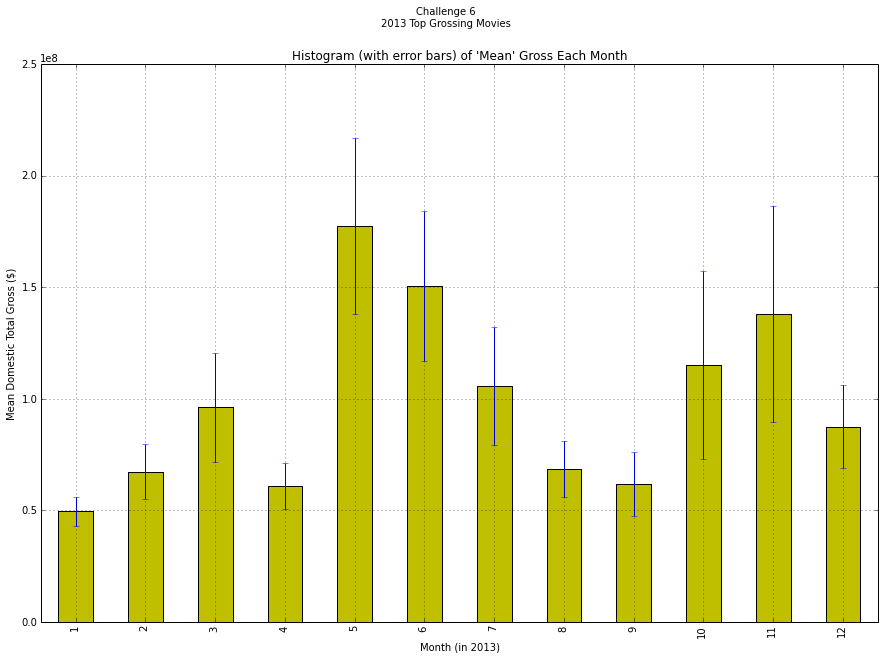

In [18]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
p = monthmeans.plot(y='mean',kind='bar',yerr=monthmeans['sem'], ax=ax,
                    color ='y', ecolor='b')

plt.suptitle("Challenge 6 \n2013 Top Grossing Movies")
 
plt.title("Histogram (with error bars) of 'Mean' Gross Each Month")
plt.ylabel('Mean Domestic Total Gross ($)')
plt.xlabel('Month (in 2013)')